**<h1 align=center><font size = 5>Meeting in Class 24 - Clustering with Python</font></h1>**


**Tuesday, 26 April 2022**

*Modified by Ahmad Nafiys Ismail*

Outline:
* **Part I**
    * Recap
    * Load & Explore Data
        * Data Understanding
    * Data Analysis
        * Exploratory Data Analysis
        * Data Preparation
* **Part II**
    * Model Development
        * Data Preparation
        * Modelling
    * Model Evaluation
        * Cluster Cardinality & Magnitude
        * Elbow Method
        * Silhouette Score

# Clustering with Python - Part 1

* Clustering merupakan sebuah teknik yang digunakan untuk menemukan sub-kelompok atau kluster. Prinsip dari clustering adalah data-data yang termasuk dalam kluster yang sama “diharapkan” memiliki kesamaan satu dengan yang lainnya, sedangkan data-data yang ada dalam kluster yang berbeda cukup berbeda dari satu kluster dengan cluster yang lainnya.

* Meskipun tanpa label, clustering memanfaatkan “karakter/pola” pada data bahwa data yang “mirip” akan berdekatan, seperti pada gambar di samping.

<div align="center">
<img src="https://miro.medium.com/max/1280/1*WkU1q0Cuha2QKU5JnkcZBw.gif" width=50%/>
</div>

## **0 Libraries**

Cell berikut berisi semua _library_ yang akan kita gunakan dan diurutkan mengikuti konvensi [PEP8](https://peps.python.org/pep-0008/).

In [ ]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt # visualisasi normal
import numpy as np # memanggil fungsi aritmatika
import pandas as pd # memanggil fungsi tabular
import seaborn as sns # visualisasi komprehensif (heatmap, violin, degradasi, raw time)

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import SilhouetteVisualizer

## **1 Data Loading & Exploration**

* Kita akan menggunakan data pada kompetisi [H&M Personalized Fashion Recommendations](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations). Data yang disediakan adalah histori pembelian customer selama kurun waktu tertentu beserta dengan metadata pendukung.

* Namun, tujuan kita tidak akan membuat sebuah sistem rekomendasi, melainkan segmentasi customer. Segmentasi customer adalah proses membagi pelanggan berdasarkan karakteristik umum, seperti demografi atau perilaku, sehingga perusahaan dapat melakukan pemasaran secara lebih efektif.

> Beberapa keuntungan dari segmentasi customer seperti:
* membuat kampanye marketing yang terkustomisasi
* menentukan fitur apa yang bisa dirilis untuk customer tertentu
* membuat prioritas dalam pengembangan produk
* menentukan harga produk sesuai dengan segmen customer
dan lainnya

Pada kasus ini, kita akan mencoba mencari tahu apa saja segmen customer yang ada menggunakan data customer H&M.

> Secara umum, terdapat 4 jenis data:
* data gambar yang berkaitan dengan masing-masing artikel
* data transaksi oleh customer
* data metadata setiap customer 
* data artikel/produk

* Untuk menggunakan dataset, silakan akses link gdrive [berikut](https://drive.google.com/drive/folders/1TCP0A3ahIcd5CbH2CaNiEk1D9i0RaSlx?usp=sharing), lalu klik pada nama folder, kemudian pilih _"Add a shortcut to Drive"_, pilih untuk meletakkan folder data di halaman Google Drive kamu.

<div align="center">
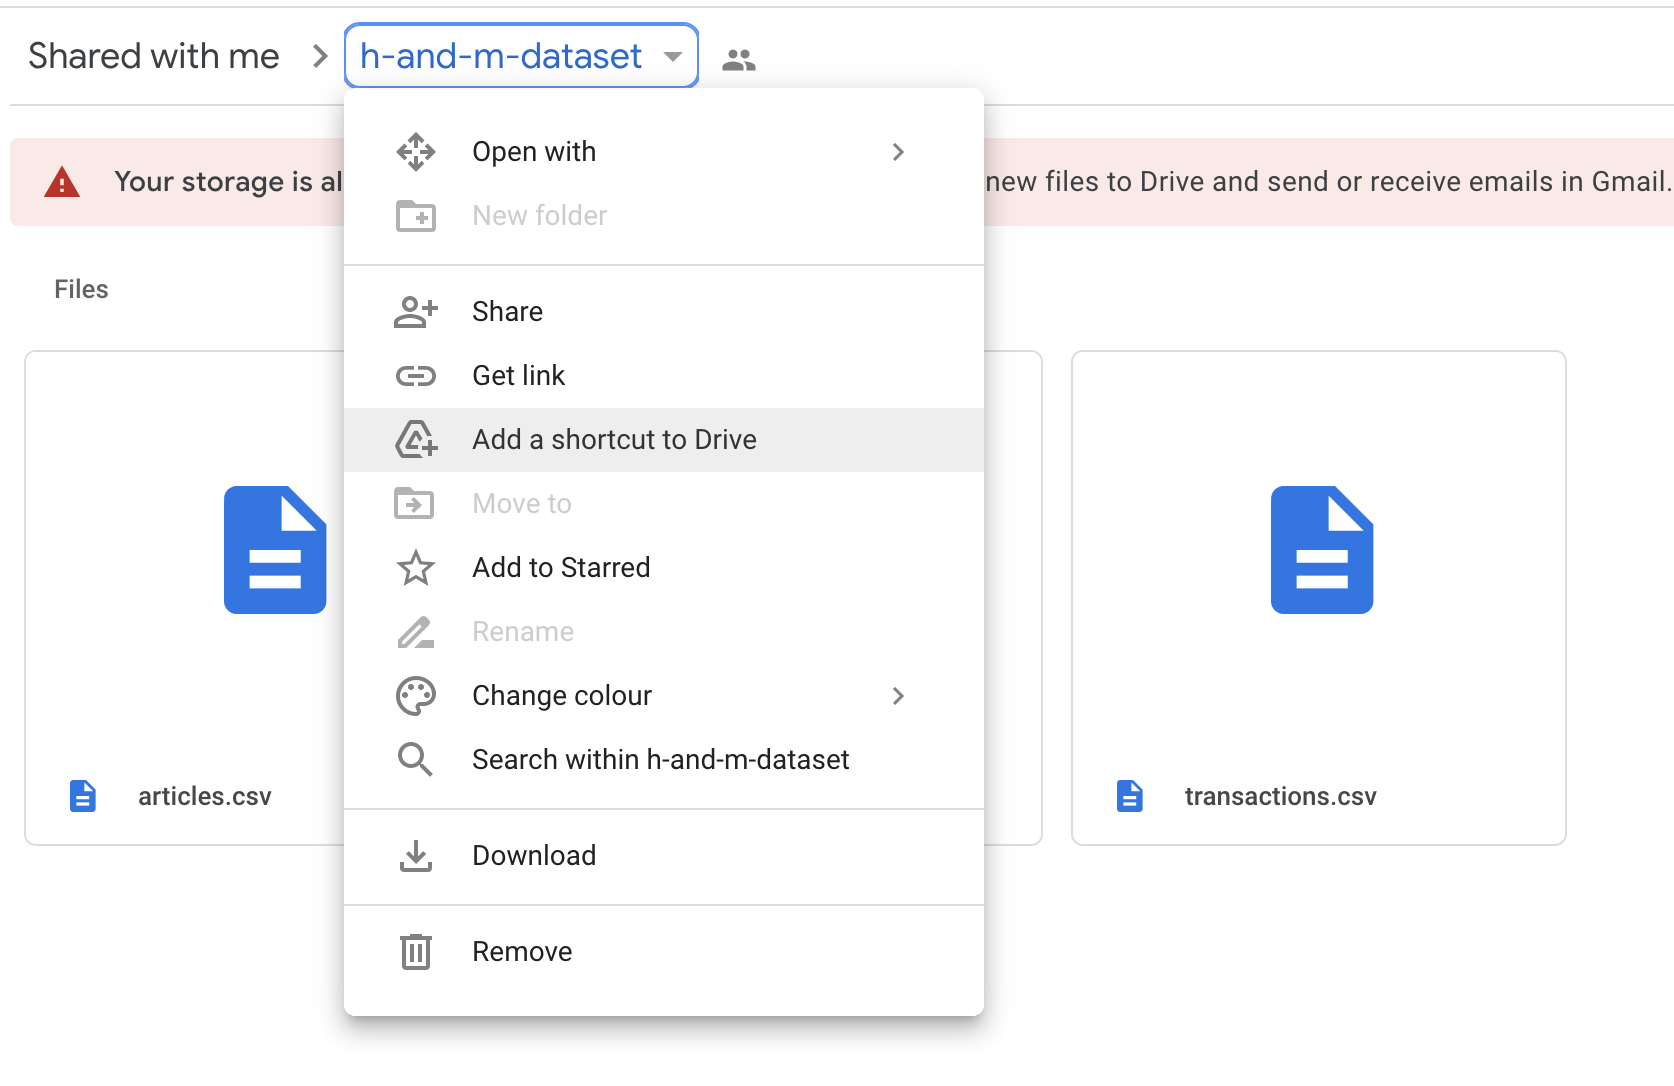
</div>

<div align="center">
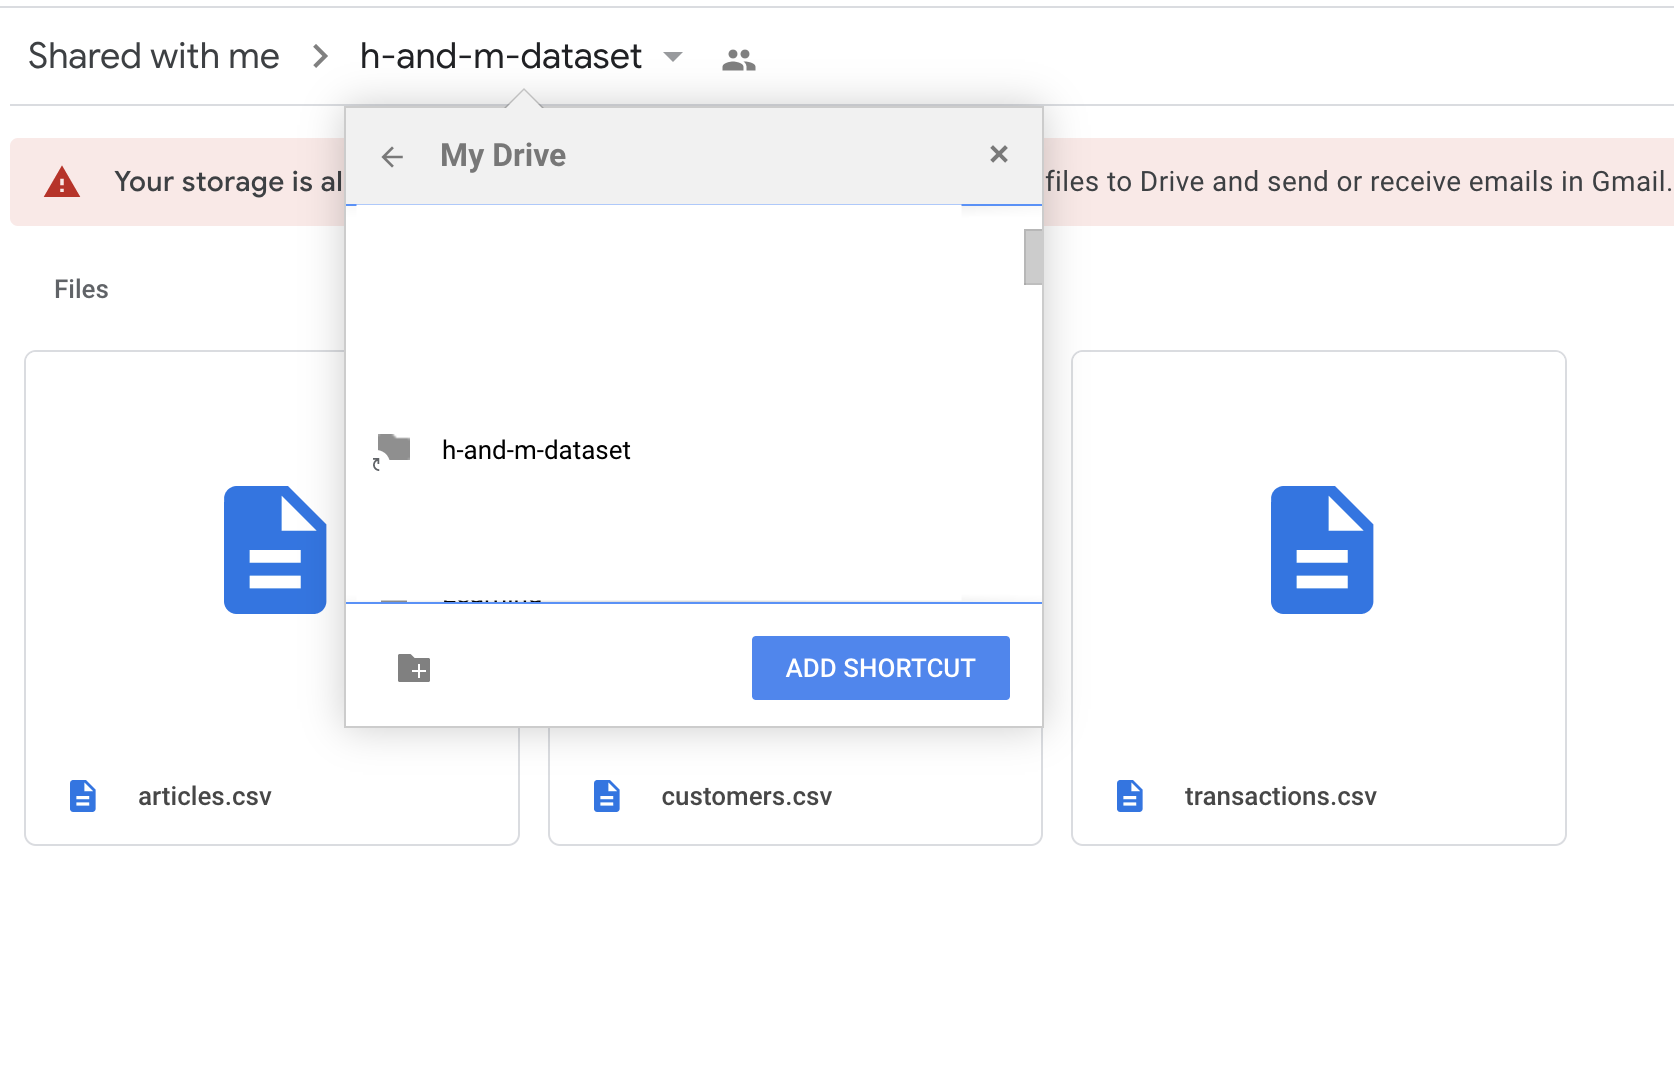
</div>

* Kemudian, mount Drive kamu pada folder Google Colab. Jika langkah di atas sudah kamu ikuti dengan benar, kamu dapat memuat dataset pada direktori `drive/MyDrive/h-and-m-dataset/`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
start = time()
df_articles = pd.read_csv("drive/MyDrive/h-and-m-dataset/articles.csv")
df_customers = pd.read_csv("drive/MyDrive/h-and-m-dataset/customers.csv")
df_transactions = pd.read_csv("drive/MyDrive/h-and-m-dataset/transactions.csv")
end = time()

print("Done loading all datasets in {:.3f}s".format(end-start))

Done loading all datasets in 62.541s


In [ ]:
print("num of articles:", df_articles.shape[0])
print("num of customers:", df_customers.shape[0])
print("num of transactions:", df_transactions.shape[0])

num of articles: 105542
num of customers: 1371980
num of transactions: 31788324


> **Insights:**

Dari angka di atas, terdapat total kurang lebih **31 juta** lebih transaksi yang dilakukan oleh sekitar **1,3 juta** customer untuk lebih dari **100 ribuan** artikel.

### 1.1 Article

In [ ]:
with pd.option_context("display.max_columns", None):
    display(df_articles.head())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# Pilih indeks pertama pada df_article
df_articles.loc[0]

article_id                                                    108775015
product_code                                                     108775
prod_name                                                     Strap top
product_type_no                                                     253
product_type_name                                              Vest top
product_group_name                                   Garment Upper body
graphical_appearance_no                                         1010016
graphical_appearance_name                                         Solid
colour_group_code                                                     9
colour_group_name                                                 Black
perceived_colour_value_id                                             4
perceived_colour_value_name                                        Dark
perceived_colour_master_id                                            5
perceived_colour_master_name                                    

In [ ]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

> **Insights:**

* Pada data artikel, terdapat 25 fitur yang merepresentasikan informasi tentang artikel tersebut, yaitu nama produk, warna produk, deskripsi produk, dan sebagainya.

* Sayangnya, tidak ada data dictionary yang tersedia, sehingga kita sedikit kesulitan mengartikan masing-masing fitur.

* Hampir semua fitur tidak memiliki missing values. Hanya fitur `detail_desc` yang memiliki beberapa _missing values_ (105126 dari 105542)

### 1.2 Customer

In [ ]:
df_customers.head() # menampilkan 5 data teratas

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
df_customers.tail() # menampilkan 5 data terbawah

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,NaN,NaN,PRE-CREATE,NONE,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


> **Insights:**

* Pada data customer, terdapat 7 fitur yang merepresentasikan informasi tentang customer, seperti umur, status keanggotaan, dan lainnya.

* Dari informasi di atas, terlihat bahwa hampir semua fitur yang ada pada `df_customers` memiliki _missing values_. 

* Fitur yang paling banyak memiliki _missing values_ adalah `Active`, sedangkan fitur yang tidak memiliki _missing values_ adalah `customer_id` dan `postal_code`.

* Sama seperti data artikel, dikarenakan tidak ada data dictionary yang tersedia, sehingga kita akan sedikit kesulitan mengartikan masing-masing fitur.

* Untuk mengetahui representasi masing-masing fitur, kita perlu melihat nilai-nilai yang ada di masing-masing fitur tersebut

### 1.3 Transactions

In [ ]:
with pd.option_context("display.max_columns", None):
    display(df_transactions.head())

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


* Pada data transaksi, terdapat 5 fitur yang merepresentasikan sebuah transaksi, seperti tanggal  transaksi, nomor customer, dan nomor artikel, harga artikel, dan channel penjualan.

* Karena jumlah baris yang sangat banyak (**~31 juta baris**), fungsi `info` tidak bisa menampilkan jumlah non-missing values.

* Dengan kode di samping, isna().sum(), untuk setiap fitur pada data transaksi, tidak terdapat missing values sama sekali


In [ ]:
df_transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

> **Insights:**

Terlihat bahwa tidak ada missing values pada setiap kolom pada data transaksi di atas.

## **2 Exploratory Data Analysis**

* Karena terdapat 3 dataset yang saling melengkapi satu sama lain, kita akan melakukan eksplorasi untuk ketiga dataset tersebut.

* Khusus untuk eksplorasi pada **data transaksi**, kita akan gabungkan terlebih dahulu data customer dan artikel dengan data transaksi, sehingga setiap baris pada data transaksi akan terdiri dari gabungan fitur-fitur dari data customer, artikel, dan transaksi.

> Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:
* Eksplor data artikel, seperti jumlah (unik) artikel yang tersedia, jenis warna yang tersedia pada suatu produk, jenis garmen, dan lainnya
* Eksplor data customer, seperti rentang umur customer, jumlah customer yang mendapatkan newsletter, status keanggotaan, dan lainnya
* Eksplor data transaksi yang mencakup jumlah pembelian harian / bulanan / tahunan, produk terpopuler, CLV, dan lainnya

Pertama-tama, kita akan coba eksplor data artikel terlebih dahulu.

### 2.1 Data: Articles
* Jika kita perhatikan dari tipe data tiap fitur, fitur-fitur yang berisi kode atau identifier produk dianggap sebagai integer, sedangkan secara konteks adalah bukan integer. Oleh karena itu, kita akan mengubah beberapa fitur tersebut menjadi tipe data `object`.

In [ ]:
df_articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

* Jika kita perhatikan fitur `article_id`, `product_code`, `product_type_no`, dan sejenisnya bertipe data integer. Fitur tersebut seharusnya bertipe data kategorik karena tidak mencerminkan deret angka. Oleh karena itu, kita akan coba ubah tipe data fitur tersebut menjadi object.

In [ ]:
# Instruksi looping untuk mengubah tipe data pada kolom yang berakhiran dengan 'id','no', dan 'code' menggunakan function astype()
for feature in df_articles.columns:
    if (
        feature.endswith("id")
        or feature.endswith("no")
        or feature.endswith("code")
    ):
        df_articles[feature] = df_articles[feature].astype("object")

In [ ]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  object
 1   product_code                  105542 non-null  object
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  object
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  object
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  object
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  object
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  object
 13 

* Setelah konversi tipe data, terlihat bahwa semua fitur dalam data artikel tidak ada yang berjenis numerik.

In [ ]:
for feature in df_articles.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df_articles[feature].nunique()
    )

- num of unique values in `article_id`: 105542
- num of unique values in `product_code`: 47224
- num of unique values in `prod_name`: 45875
- num of unique values in `product_type_no`: 132
- num of unique values in `product_type_name`: 131
- num of unique values in `product_group_name`: 19
- num of unique values in `graphical_appearance_no`: 30
- num of unique values in `graphical_appearance_name`: 30
- num of unique values in `colour_group_code`: 50
- num of unique values in `colour_group_name`: 50
- num of unique values in `perceived_colour_value_id`: 8
- num of unique values in `perceived_colour_value_name`: 8
- num of unique values in `perceived_colour_master_id`: 20
- num of unique values in `perceived_colour_master_name`: 20
- num of unique values in `department_no`: 299
- num of unique values in `department_name`: 250
- num of unique values in `index_code`: 10
- num of unique values in `index_name`: 10
- num of unique values in `index_group_no`: 5
- num of unique values in `inde

> **Insights:**

Dari informasi di atas:
* terdapat perbedaan jumlah nilai unik antara beberapa pasangan kode dan nama, seperti `product_code` dengan `prod_name`, `product_type_no` dengan `product_type_name`, `department_no` dengan `department_name`, dan lainnya. Sehingga kita mungkin perlu melihat **two-way table** antara kedua fitur tersebut
* karena `index_group_name` adalah fitur dengan jumlah nilai unik paling sedikit, yang mungkin berarti ada 5 grup besar yang membagi produk H&M
* apa lagi yang bisa kamu ambil dari informasi di atas?

Agar lebih mudah untuk diamati, kita akan buat visualisasi menggunakan fungsi berikut.

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

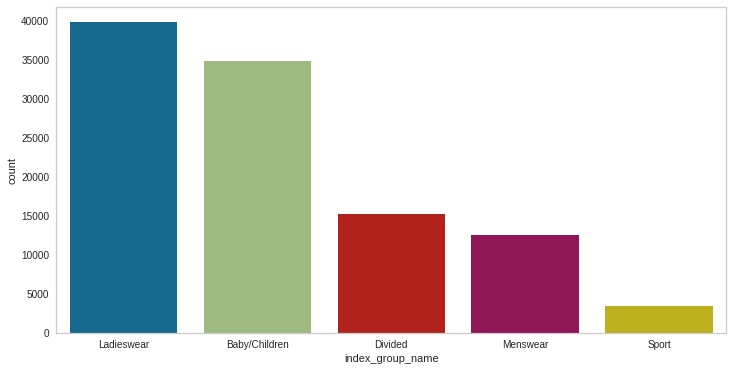

In [ ]:
plot_count(x="index_group_name", data=df_articles)

> **Insights:**

Dari visualisasi di atas, diperoleh:
* `Ladieswear` atau pakaian untuk perempuan menjadi kelompok grup yang paling banyak disediakan oleh H&M
* sebaliknya, ketersediaan pakaian olahraga atau `'sport'` oleh H&M paling sedikit dibandingkan dengan yang kelompok pakaian lainnya

* Selanjutnya, kita lihat dari nama fitur yang mirip, yaitu  `index_group_name` dengan `index_name`, sekarang kita akan coba bandingkan.

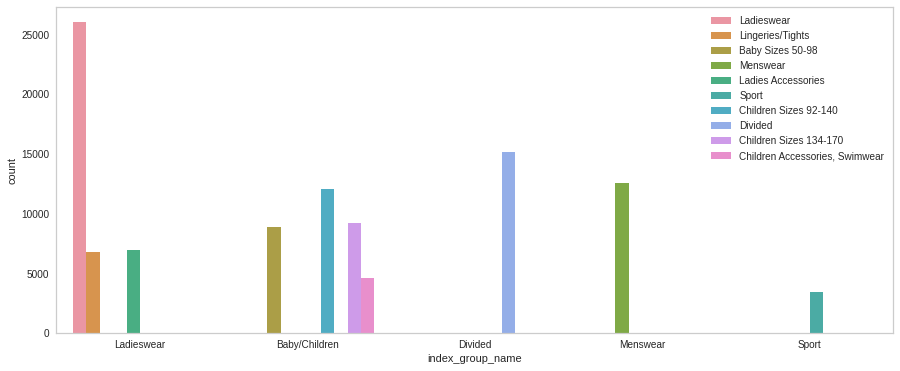

In [ ]:
plot_count(x="index_group_name", hue="index_name",data=df_articles, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

> **Insights:**

Dari visualisasi di atas:
* hanya kelompok `Ladieswear` dan `Baby/Children` yang memiliki sub-kelompok indeks
* sub-kelompok dari `Ladieswear` terdiri dari:
    * `Ladieswear`
    * `Lingeries/Tights`
    * `Ladies/Accessories`
* sub-kelompok dari `Baby/Children` terdiri dari:
    * `Baby Sizes 50-98`
    * `Children Sizes 92-140`
    * `Children Sizes 134-170`
    * `Children Accessories, Swimwear`
    
> Kemudian, saat pelanggan memilih sebuah produk fashion, salah satu faktor yang menjadi pertimbangan adalah **warna**. Mari kita coba lihat warna apa saja yang disediakan oleh H&M.

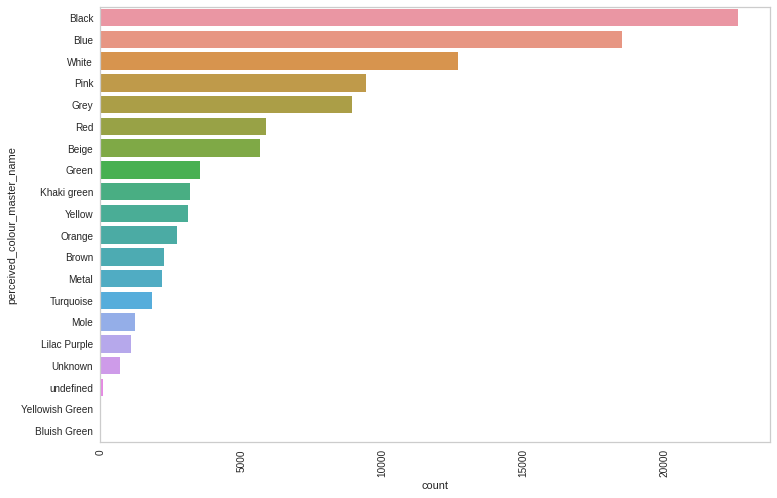

In [ ]:
plot_count(y="perceived_colour_master_name", data=df_articles, figsize=(12, 8))
plt.xticks(rotation=90)
plt.show()

> **Insights:**

Terlihat dari visualisasi di atas:
* 5 warna yang teratas adalah:
    * `Black`
    * `Blue`
    * `White`
    * `Pink`
    * `Grey`
* terdapat warna `unknown` dan `undefined`, maka warna ini perlu kita tinjau lebih jauh lagi tentang produk yang memiliki warna tersebut, apakah produk tsb sebuah pakaian ataukah aksesoris

* Perihal warna, kita mungkin sadar bahwa pakaian pria dan pakaian wanita mungkin memiliki jenis warna yang berbeda jenisnya. Sehingga, menarik untuk kita lihat bagaimana H&M memilih warna-warna untuk kelompok produk `Ladieswear` dan `Menswear`.

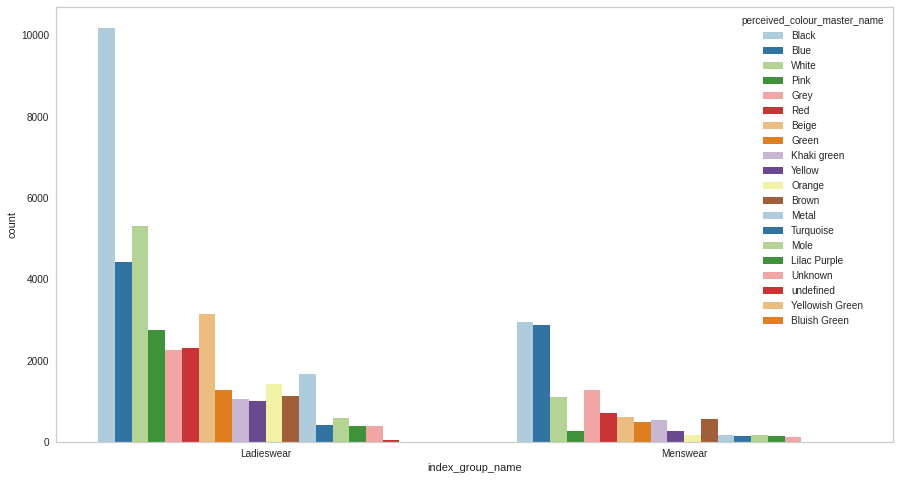

In [ ]:
df_ladies_mens = df_articles[df_articles.index_group_name.isin(["Ladieswear", "Menswear"])
]
plot_count(
    hue="perceived_colour_master_name",
    x="index_group_name",
    data=df_ladies_mens,
    palette="Paired",
    figsize=(15, 8),
    hue_order=df_articles.perceived_colour_master_name.value_counts().index
)

> **Insights:**

Dari visualisasi di atas:
* baik `Ladieswear` dan `Menswear`, warna hitam menjadi warna yang populer dan paling banyak produknya
* 5 warna teratas untuk kelompok pakaian `Ladieswear` adalah:
    * `Black`
    * `White`
    * `Blue`
    * `Beige`
    * `Pink`
* 5 warna teratas untuk kelompok pakaian `Menswear` adalah:
    * `Black`
    * `Blue`
    * `Grey`
    * `White`
    * `Red`
* kedua kelompok pakaian tersebut masih memiliki warna `unknown` dan `undefined`


> Selanjutnya, mari kita lihat bagaimana warna `unknown` dan `undefined` ini bisa ada di 2 kelompok tersebut.

In [ ]:
df_ladies_mens.loc[df_ladies_mens.perceived_colour_master_name.isin(["unknown", "undefined"]),
    ["product_type_name", "product_group_name", "graphical_appearance_name",
     "perceived_colour_master_name", "index_name", "section_name"]].sample(10)

,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_master_name,index_name,section_name
102607,Boots,Shoes,Solid,undefined,Ladies Accessories,Womens Shoes
45344,Socks,Socks & Tights,All over pattern,undefined,Lingeries/Tights,"Womens Nightwear, Socks & Tigh"
11297,Sweater,Garment Upper body,Melange,undefined,Ladieswear,Womens Casual
15452,Blouse,Garment Upper body,Solid,undefined,Ladieswear,Womens Tailoring
19683,Jacket,Garment Upper body,Solid,undefined,Ladieswear,Womens Jackets
24450,Underwear bottom,Underwear,All over pattern,undefined,Menswear,Men Underwear
67939,Shorts,Garment Lower body,Solid,undefined,Ladieswear,Womens Everyday Collection
11110,Socks,Socks & Tights,Glittering/Metallic,undefined,Lingeries/Tights,"Womens Nightwear, Socks & Tigh"
42080,Dress,Garment Full body,Solid,undefined,Ladieswear,Womens Everyday Collection
16724,Coat,Garment Upper body,Solid,undefined,Ladieswear,Womens Jackets


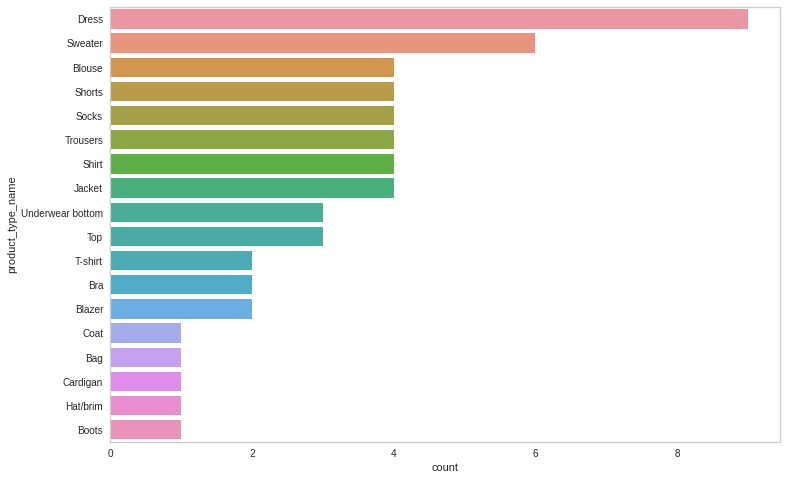

In [ ]:
plot_count(y="product_type_name",data=df_ladies_mens[df_ladies_mens.perceived_colour_master_name.isin(["unknown", "undefined"])],
    figsize=(12, 8))

> **Question**

Kesimpulan apa yang bisa kamu ambil dari visualisasi di atas?

### 2.2 Data: Customers

Di data Customers terdapat banyak nilai _missing values_ , selanjutnya kita akan coba eksplor _missing values_ tersebut.

> Notes. Karena alasan privasi, kita hanya bisa mengeksplor fitur-fitur seperti `FN`, `Active`, `club_member_status`, `fashion_news_frequency`, dan `age`.

#### 2.2.1 Missing Values
Kita akan coba lihat apakah ada pola khusus untuk  _missing values_ pada masing-masing fitur

In [ ]:
df_customers[df_customers.isna().all(axis=1)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code


> **Insights:**

Dari data di atas, terlihat bahwa tidak ada baris yang semua nilai fiturnya kosong.

In [ ]:
for feature in df_customers.columns:
    # hanya pilih fitur yang memiliki missing values dan tampilkan nilai missing values dan hitung jumlahnya dengan unique()
    if df_customers[feature].isna().any():
        print(f"num of unique values in {feature}: ",
            df_customers[feature].unique())

num of unique values in FN:  [nan  1.]
num of unique values in Active:  [nan  1.]
num of unique values in club_member_status:  ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
num of unique values in fashion_news_frequency:  ['NONE' 'Regularly' nan 'Monthly' 'None']
num of unique values in age:  [49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97.
 89. 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


> **Insights:**

* Khusus pada fitur `FN` dan `Active`, terlihat bahwa hanya ada `1` untuk nilai _non-missing value_. 

* Berdasarkan representasi fitur yang sudah dibahas di slides, yaitu 
  * `FN` merepresentasikan apakah customer mendapatkan fashion newsletter atau tidak 
  * `Active` merepresentasikan apakah customer aktif untuk berkomunikasi, kita bisa anggap nilai `nan` sama dengan `0`. 

* Sehingga, kita akan isi nilai `nan` pada kedua fitur tersebut dengan nilai `0`.

In [ ]:
# Pilih kedua kolom dan isi missing value dengan 0
df_customers[["FN", "Active"]] = df_customers[["FN", "Active"]].fillna(0)

In [ ]:
# Cek missing values
df_customers[["FN", "Active"]].isna().sum()

FN        0
Active    0
dtype: int64

* Selanjutnya, kita akan coba lihat _missing values_ yang ada pada fitur `club_member_status` dan `fashion_news_frequency`.
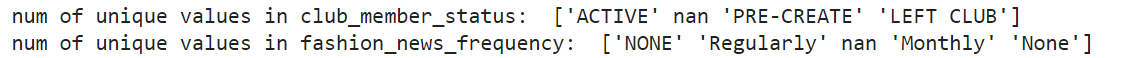

* Khusus untuk `fashion_news_frequency`, terdapat tiga jenis nilai yang mungkin sama, yaitu `NONE`, `None`, dan `nan`. Untuk penyederhanaan, kita akan anggap ketiga nilai tersebut sama, yaitu `nan` (string). Kemudian, nilai `nan` tersebut akan diisi berdasarkan hubungan dengan 2 fitur yang lain, `club_member_status` dan `FN`.

In [ ]:
df_customers["fashion_news_frequency"] = (df_customers["fashion_news_frequency"].replace({"NONE": np.nan, "None": np.nan}))

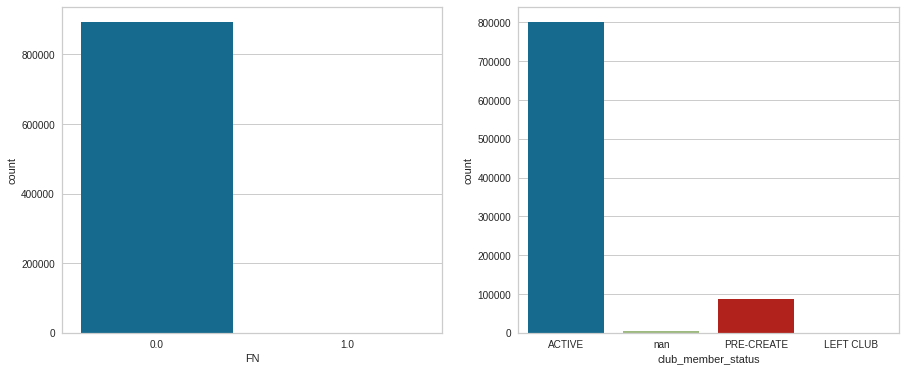

In [ ]:
customer_news_nan = df_customers.loc[df_customers["fashion_news_frequency"].isna(),
                                     ["FN", "club_member_status", "fashion_news_frequency"]].fillna("nan")

fig, axis = plt.subplots(1, 2, figsize=(15, 6))
for ax, x in zip(axis, ["FN", "club_member_status"]):
    sns.countplot(x=x, data=customer_news_nan, ax=ax)

In [ ]:
customer_news_nan.value_counts()

FN   club_member_status  fashion_news_frequency
0.0  ACTIVE              nan                       799632
     PRE-CREATE          nan                        87106
     nan                 nan                         5734
1.0  ACTIVE              nan                          777
0.0  LEFT CLUB           nan                          459
1.0  PRE-CREATE          nan                            8
     nan                 nan                            6
dtype: int64

> **Insights:**

Dari visualisasi dan informasi di atas, bisa disimpulkan bahwa:
* Semua customer dengan nilai `nan` pada `fashion_news_frequency` dan nilai `FN=0`, akan diisi dengan `Never`, dengan asumsi customer yang tidak mengikuti newsletter **tidak akan pernah** mendapatkan berita fashion dari H&M
* Semua customer dengan dengan nilai `nan` pada `fashion_news_frequency`, `club_member_status` yang bernilai `nan` atau `ACTIVE`, dan nilai `FN=1` akan diisi dengan nilai `Other`
*  Semua customer dengan `club_member_status=PRE_CREATE` dengan kondisi nilai `FN=1`diasumsikan bahwa customer tersebut masih dalam proses pembuatan akun / member, sehingga perlu jenis nilai yang berbeda. Oleh karena itu, kita akan isi nilai `nan` pada `fashion_news_frequency` dengan nilai `Not Yet`.

In [ ]:
def fill_fn_freq_nan(row):
    if row.fashion_news_frequency is not np.nan:
        return row.fashion_news_frequency

    if row.FN == 0:
        return "Never"

    if (row.FN == 1) & (row.club_member_status == "ACTIVE"):
        return "Other"
    if (row.FN == 1) & (row.club_member_status is np.nan):
        return "Other"

    if (row.FN == 1) & (row.club_member_status == "PRE-CREATE"):
        return "Not Yet"

In [ ]:
# Terapkan function tersebut pada kolom "fashion_news_frequency"
df_customers["fashion_news_frequency"] = df_customers.apply(fill_fn_freq_nan, axis=1)

In [ ]:
print(df_customers[["FN", "club_member_status", "fashion_news_frequency"]].value_counts())
print('------')
df_customers.info()

FN   club_member_status  fashion_news_frequency
0.0  ACTIVE              Never                     799632
1.0  ACTIVE              Regularly                 469284
0.0  PRE-CREATE          Never                      87106
1.0  PRE-CREATE          Regularly                   5708
0.0  ACTIVE              Regularly                   2020
1.0  ACTIVE              Other                        777
                         Monthly                      765
0.0  LEFT CLUB           Never                        459
     PRE-CREATE          Regularly                     79
1.0  PRE-CREATE          Monthly                       59
0.0  ACTIVE              Monthly                       13
1.0  LEFT CLUB           Regularly                      8
     PRE-CREATE          Not Yet                        8
dtype: int64
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------

* Berdasarkan info Non-Null di atas, fitur selanjutnya yang perlu dilihat _missing values_ yaitu pada fitur `club_member_status`.

In [ ]:
df_customers[["Active", "club_member_status",]].value_counts(dropna=False)

Active  club_member_status
0.0     ACTIVE                814039
1.0     ACTIVE                458452
0.0     PRE-CREATE             87329
        NaN                     5744
1.0     PRE-CREATE              5631
0.0     LEFT CLUB                464
1.0     NaN                      318
        LEFT CLUB                  3
dtype: int64

> **Insights:**

Jika kita lihat distribusi nilai `club_member_status` berdasarkan nilai pada fitur `Active `, bisa disimpulkan:
* untuk customer dengan `Active=0`, kita akan isi `nan` pada `club_member_status` dengan `NON-ACTIVE`
* untuk customer dengan `Active=1`, kita akan isi dengan nilai `UNKNOWN` 

In [ ]:
# Buat function berdasarkan kondisi di atas
def fill_member_status_nan(row):
    if row.club_member_status is not np.nan:
        return row.club_member_status

    if row.Active == 0:
        return "NON-ACTIVE"
    return "UNKNOWN"

In [ ]:
# Terapkan function apply() pada kolom club_member_status
df_customers["club_member_status"] = df_customers.apply(fill_member_status_nan, axis=1)

In [ ]:
print(df_customers[["Active", "club_member_status"]].value_counts())
df_customers.info()

Active  club_member_status
0.0     ACTIVE                814039
1.0     ACTIVE                458452
0.0     PRE-CREATE             87329
        NON-ACTIVE              5744
1.0     PRE-CREATE              5631
0.0     LEFT CLUB                464
1.0     UNKNOWN                  318
        LEFT CLUB                  3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1371980 non-null  object 
 4   fashion_news_frequency  1371980 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


* Selanjutnya, fitur yang masih memiliki _missing values_ yaitu fitur `age`.
* untuk penyederhanaan, kita akan isi dengan nilai median fitur tersebut.

In [ ]:
df_customers["age"] = df_customers.age.fillna(df_customers.age.median())

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1371980 non-null  object 
 4   fashion_news_frequency  1371980 non-null  object 
 5   age                     1371980 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


* Sekarang data kita telah lengkap tanpa nilai yang hilang. Selanjutnya, kita akan mencoba eksplor dengan memvisualisasikan fitur-fitur yang ada di data Customers untuk mendapatkan insight yang lebih.

#### 2.2.2 Data Visualization

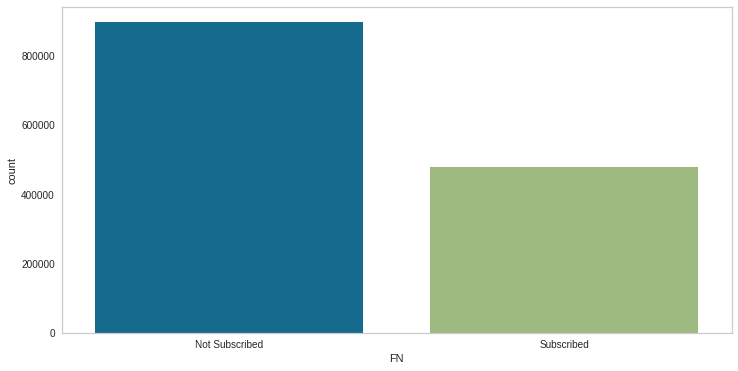

In [ ]:
plot_count(x="FN", data=df_customers)
plt.xticks([0, 1], ["Not Subscribed", "Subscribed"])
plt.show()

* Dari visualisasi di atas, terlihat bahwa **kebanyakan customer H&M tidak mendapatkan newsletter**.

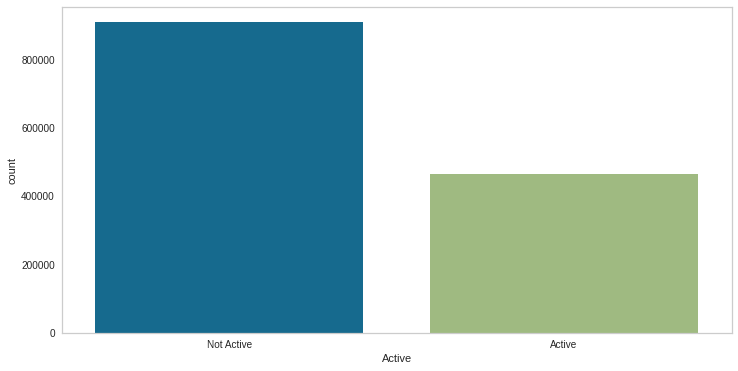

In [ ]:
plot_count(x="Active", data=df_customers)
plt.xticks([0, 1], ["Not Active", "Active"])
plt.show()

* Kebanyakan dari customer juga **tidak aktif untuk berkomunikasi**.

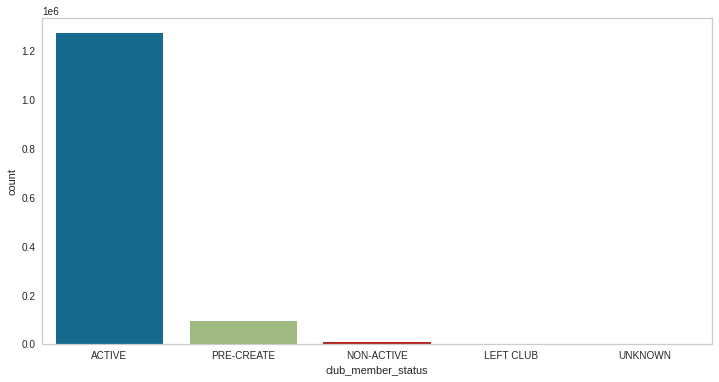

In [ ]:
plot_count(x="club_member_status", data=df_customers)
plt.show()

* Namun secara umum, status keanggotaan customer adalah **`ACTIVE`**.

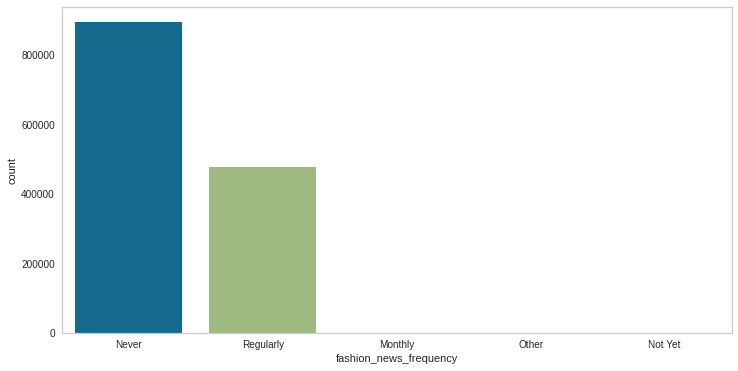

In [ ]:
plot_count(x="fashion_news_frequency", data=df_customers)
plt.show()

* Terlihat juga bahwa kebanyakan customer **tidak pernah mendapatkan berita fashion dari H&M**. Hal ini juga sangat masuk akal karena banyak customer yang tidak mengikuti _newsletter_ dari H&M.

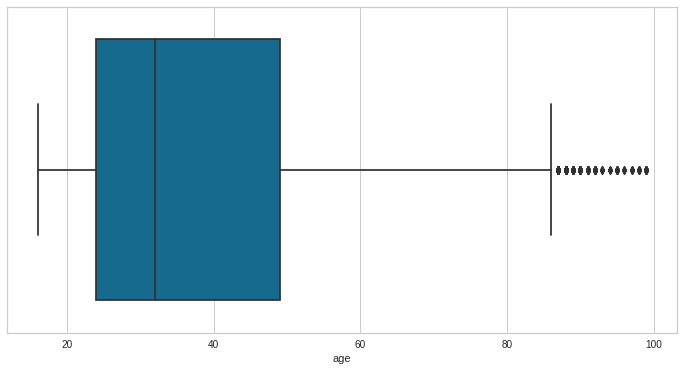

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="age", data=df_customers)
plt.show()

> **Insights:**

* Dari visualisasi boxplot di atas, terlihat bahwa terdapat pencilan di mana umur customer lebih dari 80 tahun. Ini mungkin sangat menarik untuk ditinjau lebih jauh lagi bagaimana transaksi yang mereka lakukan yang tercermin dalam data transaksi.

* Kita bisa eksplor lebih jauh lagi, seperti membuat visualisasi yang mengombinasikan beberapa fitur kategorik pada data customer.

### 2.3 Data: Transactions

Jika kita perhatikan sekali lagi informasi data transaksi di samping, terdapat lebih dari 31 juta baris transaksi
Untuk mengolah data sebesar itu, kita mungkin memerlukan resource yang lebih besar juga, seperti RAM, CPU, GPU, dan mungkin library yang lebih mutakhir. Oleh karena itu, pada meeting ini kita hanya akan menggunakan data transaksi di tahun 2020.


* Kita akan lakukan **join** antara data artikel dan customer dengan data transkasi. Kita bisa menggunakan `merge` atau `join` dari Pandas.

* Tapi, sebelum itu, kita akan coba mengubah beberapa tipe data di data transaksi yang mungkin kurang tepat.

In [ ]:
df_transactions["t_dat"] = df_transactions.t_dat.astype("datetime64")
df_transactions["article_id"] = df_transactions.article_id.astype("object")
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        object        
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ GB


* Untuk melakukan join, **data transaksi** akan bertindak sebagai **right table** dan **data artikel dan customer** akan bertindak sebagai **left table**. 

* Selain itu, karena kita tidak ingin kehilangan data transaksi meskipun (mungkin) tidak memiliki pasangan di data artikel ataupun customer, kita akan menggunakan prinsip **right join**.

* Karena alasan keterbatasan RAM Google Colab, kita akan menggunakan sebagian data transaksi saja, yaitu **data transaksi dari bulan Juni 2020 sampai transaksi terakhir**

In [ ]:
# Filter data transaksi 
df_transactions = df_transactions[df_transactions.t_dat >= "2020-06"].reset_index(drop=True)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        object        
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 196.5+ MB


In [ ]:
# Lakukan merge() pada artikel dengan transaksi
df_article_transactions = df_articles.merge(df_transactions, how="right", on="article_id")

# Lakukan merge() pada gabungan artikel transaksi dengan data customer
df_all = df_customers.merge(df_article_transactions, how="right", on="customer_id")

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   customer_id                   object        
 1   FN                            float64       
 2   Active                        float64       
 3   club_member_status            object        
 4   fashion_news_frequency        object        
 5   age                           float64       
 6   postal_code                   object        
 7   article_id                    object        
 8   product_code                  object        
 9   prod_name                     object        
 10  product_type_no               object        
 11  product_type_name             object        
 12  product_group_name            object        
 13  graphical_appearance_no       object        
 14  graphical_appearance_name     object        
 15  colour_group_code             ob

In [ ]:
df_all.isna().sum()

customer_id                        0
FN                                 0
Active                             0
club_member_status                 0
fashion_news_frequency             0
age                                0
postal_code                        0
article_id                         0
product_code                       0
prod_name                          0
product_type_no                    0
product_type_name                  0
product_group_name                 0
graphical_appearance_no            0
graphical_appearance_name          0
colour_group_code                  0
colour_group_name                  0
perceived_colour_value_id          0
perceived_colour_value_name        0
perceived_colour_master_id         0
perceived_colour_master_name       0
department_no                      0
department_name                    0
index_code                         0
index_name                         0
index_group_no                     0
index_group_name                   0
s

* Diperoleh jumlah baris yang masih sama, yaitu ~5 juta baris dengan 35 fitur, dimana gabungan 3 data tersebut. Terlihat juga dari bahwa hampir semua kolom tidak memiliki missing values. Hanya fitur `detail_desc` saja yang memiliki 3614 missing values

In [ ]:
# Tampilkan dari gabungan ke-3 data (artikel, customer, dan transaksi)
df_all.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,article_id,product_code,prod_name,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,t_dat,price,sales_channel_id
0,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,0.0,0.0,ACTIVE,Never,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...,844198001,844198,Saturn trs (J),...,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,2020-06-01,0.016932,2
1,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,777016001,777016,Cisco skirt,...,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",2020-06-01,0.030492,1
2,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,0.0,0.0,ACTIVE,Never,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...,820507001,820507,Charlotte Hipster Primula,...,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",2020-06-01,0.010153,2
3,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,0.0,0.0,ACTIVE,Never,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...,869811005,869811,OLEANDER LINEN STRAP TOP,...,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,Top in slub jersey made from a viscose and lin...,2020-06-01,0.016932,2
4,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,0.0,0.0,ACTIVE,Never,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...,823118004,823118,Ginger Top,...,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,"Fully lined, non-wired bikini top with adjusta...",2020-06-01,0.025407,2


> Kita tidak akan terlalu banyak melakukan eksplorasi karena alasan keterbatasan waktu, sehingga kamu **sangat disarankan** untuk melakukan **eksplorasi secara mandiri** sesuai dengan kreativitas kamu.



In [ ]:
num_customers = df_all.customer_id.nunique()
num_articles = df_all.article_id.nunique()

print("Number of unique customers:", num_customers)
print("Number of sold items:", num_articles)

Number of unique customers: 599002
Number of sold items: 45975


> **Insights:**

Dari informasi di atas, sebanyak **~599 ribu** pengguna yang bertransaksi mulai dari bulan Juni 2020 dengan total **~45 ribu** produk terjual.

Untuk eksplorasi selanjutnya, dari `df_all` kita akan mengelompokkan data berdasarkan 3 hal:
* **tanggal transaksi**
* **artikel**
* **customer**

In [ ]:
df_by_day = df_all.groupby("t_dat")
df_by_month = df_all.groupby(df_all.t_dat.dt.month)
df_by_customers = df_all.groupby("customer_id")
df_by_articles = df_all.groupby("article_id")

> Daily Sales

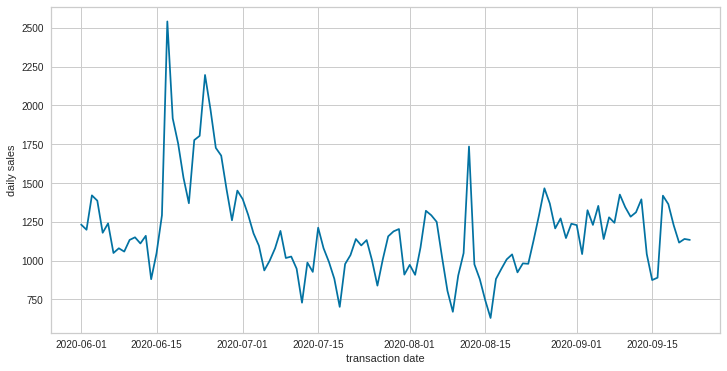

In [ ]:
daily_sales = df_by_day.agg(daily_sales=pd.NamedAgg(column="price", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="t_dat", y="daily_sales", data=daily_sales)
plt.xlabel("transaction date")
plt.ylabel("daily sales")
plt.show()

> **Question**

Kesimpulan apa yang bisa kamu ambil dari tren penjualan harian di atas?

---



> Monthly Sales

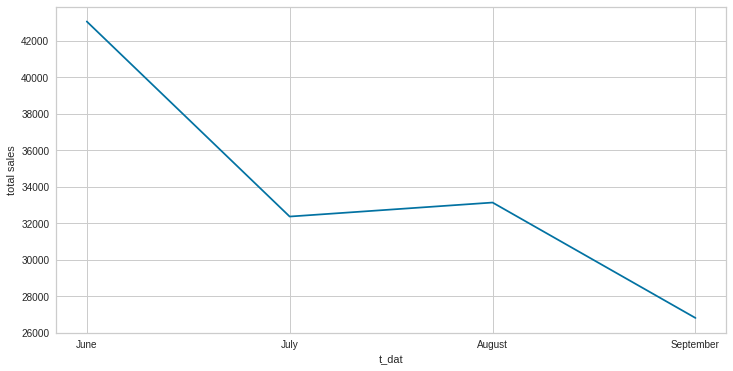

In [ ]:
monthly_sales = df_by_month.agg(monthly_sales=pd.NamedAgg(column="price", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="t_dat", y="monthly_sales", data=monthly_sales)
plt.xticks([6, 7, 8, 9], ["June", "July", "August", "September"])
plt.ylabel("total sales")
plt.show()

> **Question**

Kesimpulan apa yang bisa kamu ambil dari visualisasi tren penjualan bulanan di atas?



---





> Selanjutnya, untuk melihat behavior dari tiap customer dalam melakukan transaksi, kita akan coba untuk mendapatkan fitur seperti:
* jumlah total artikel yang dibeli
* jumlah jenis artikel yang dibeli (_unique_)
* total uang yang dikeluarkan
* rata-rata transaksi
* jumlah hari transaksi
* jumlah varian warna

In [ ]:
df_customers_agg = df_by_customers.agg(
    total_items_bought=pd.NamedAgg(
        column="article_id", aggfunc=lambda x: len(list(x))
    ),
    count_items_bought=pd.NamedAgg(
        column="article_id", aggfunc=lambda x: len(set(x))
    ),
    total_spending=pd.NamedAgg(
        column="price", aggfunc=lambda x: sum(x)
    ),
    avg_spending=pd.NamedAgg(
        column="price", aggfunc=lambda x: np.mean(x)
    ),
    count_buying_day=pd.NamedAgg(
        column="t_dat", aggfunc=lambda x: len(set(x))
    ),
    count_colour_bought=pd.NamedAgg(
        column="perceived_colour_master_name", aggfunc=lambda x: len(set(x))
    ),
).reset_index()

In [ ]:
# Summary statistics dari customer transaction
df_customers_agg.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
total_items_bought,599002.0,8.600,10.702,1.000,3.000,5.000,11.000,391.000
count_items_bought,599002.0,7.574,8.798,1.000,2.000,5.000,10.000,298.000
total_spending,599002.0,0.226,0.314,0.001,0.061,0.129,0.269,18.907
avg_spending,599002.0,0.027,0.013,0.001,0.019,0.025,0.032,0.507
count_buying_day,599002.0,2.536,2.534,1.000,1.000,2.000,3.000,85.000
count_colour_bought,599002.0,3.771,2.553,1.000,2.000,3.000,5.000,18.000


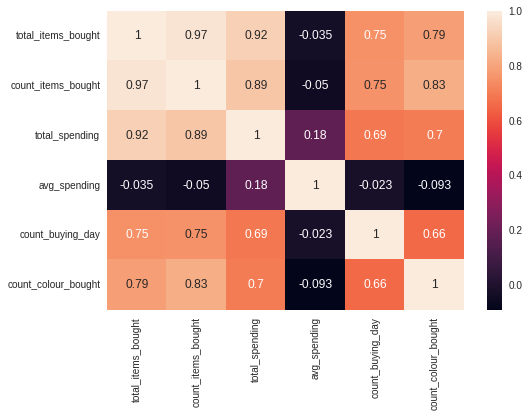

In [ ]:
# Visualisasikan hubungan antara variabel numerik pada df_customers_agg
sns.heatmap(df_customers_agg.corr(), annot=True)
plt.show()

> **Question**

 Apa yang bisa kamu ambil dari ringkasan statistik dan visualisasi korelasi antar fitur di atas?


1.   Total Item Bought >>> maka Count Items Bought >>
2.   Total Item Bought >>> maka Total Spending >>>
3. 




---




> Selanjutnya, dari data transaksi per artikel (produk), kita akan coba untuk mendapatkan fitur seperti:
* total penjualan
* gmv (Gross Merchandise Value) per produk
* jumlah customer yang membeli produk tersebut

In [ ]:
df_articles_agg = df_by_articles.agg(
    total_sold=pd.NamedAgg(column="article_id", aggfunc="count"),
    gmv_per_product=pd.NamedAgg(column="price", aggfunc=lambda x: sum(x)*len(x)),
    count_customer_bought=pd.NamedAgg(
        column="customer_id", aggfunc=lambda x: len(set(x))
    )
).reset_index()

In [ ]:
df_articles_agg.tail(10)

,article_id,total_sold,gmv_per_product,count_customer_bought
45965,948152002,3,0.283373,3
45966,949198001,123,380.612034,96
45967,949551001,188,1171.134847,173
45968,949551002,83,225.193068,76
45969,949594001,5,1.057288,4
45970,952267001,41,25.184424,34
45971,952938001,9,3.888458,9
45972,953450001,17,4.865746,16
45973,953763001,35,26.837288,23
45974,956217002,21,26.085915,17


In [ ]:
df_articles_agg.describe().round(2)

,article_id,total_sold,gmv_per_product,count_customer_bought
count,4.597500e+04,45975.00,45975.00,45975.00
mean,7.629731e+08,112.05,2192.75,98.68
std,1.237322e+08,282.59,17478.12,242.06
min,1.087750e+08,1.00,0.00,1.00
25%,7.027950e+08,3.00,0.16,3.00
50%,7.914450e+08,15.00,4.74,14.00
75%,8.559270e+08,87.00,186.02,78.00
max,9.562170e+08,6780.00,1522314.55,5316.00


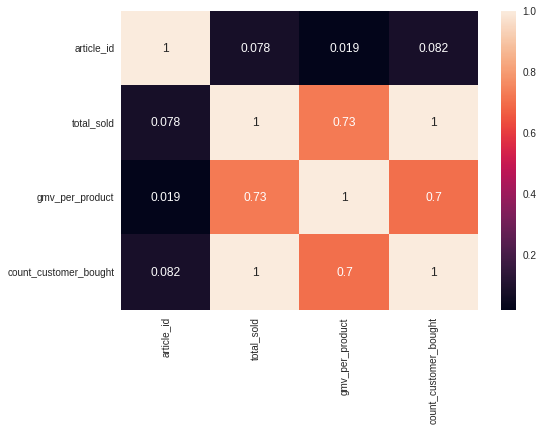

In [ ]:
# Visualisasikan hubungan antara variabel numerik pada df_articles_agg
sns.heatmap(df_articles_agg.corr(), annot=True)
plt.show()

> **Question**

Apa yang bisa kamu ambil dari ringkasan statistik dan visualisasi korelasi antar fitur di atas?


1.   Article ID >>> maka Count Cust Bought >>>
2. 



---


# Clustering with Python - Part 2

## 3 Model Development

* Karena kita akan melakukan segmentasi customer, maka data yang dipilih adalah data agregasi customer. 

* Untuk itu, kita akan coba menambahkan beberapa fitur lagi yang mungkin berguna dengan menggabungkannya dengan data customer.

In [ ]:
X = df_customers_agg.merge(df_customers, how="left", on="customer_id")
X.drop(columns=["customer_id", "postal_code"], inplace=True)
X.head()

,total_items_bought,count_items_bought,total_spending,avg_spending,count_buying_day,count_colour_bought,FN,Active,club_member_status,fashion_news_frequency,age
0,1,1,0.050831,0.050831,1,1,0.0,0.0,ACTIVE,Never,49.0
1,1,1,0.027102,0.027102,1,1,0.0,0.0,ACTIVE,Never,25.0
2,1,1,0.061000,0.061000,1,1,0.0,0.0,ACTIVE,Never,24.0
3,7,7,0.255814,0.036545,2,3,1.0,1.0,ACTIVE,Regularly,52.0
4,2,2,0.076237,0.038119,1,2,0.0,0.0,ACTIVE,Never,20.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599002 entries, 0 to 599001
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   total_items_bought      599002 non-null  int64  
 1   count_items_bought      599002 non-null  int64  
 2   total_spending          599002 non-null  float64
 3   avg_spending            599002 non-null  float64
 4   count_buying_day        599002 non-null  int64  
 5   count_colour_bought     599002 non-null  int64  
 6   FN                      599002 non-null  float64
 7   Active                  599002 non-null  float64
 8   club_member_status      599002 non-null  object 
 9   fashion_news_frequency  599002 non-null  object 
 10  age                     599002 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 54.8+ MB


### 3.1 Data Preparation

Persiapan data yang akan kita lakukan adalah:
* mengubah fitur kategorik (`club_member_status` dan `fashion_news_frequency`) menjadi matriks one-hot
* melakukan standardisasi semua fitur numerik yang sudah terbentuk

In [ ]:
encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([X.select_dtypes(exclude="object"), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.head()

,total_items_bought,count_items_bought,total_spending,avg_spending,count_buying_day,count_colour_bought,FN,Active,age,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NON-ACTIVE,club_member_status_PRE-CREATE,club_member_status_UNKNOWN,fashion_news_frequency_Monthly,fashion_news_frequency_Never,fashion_news_frequency_Other,fashion_news_frequency_Regularly
0,-0.710171,-0.747204,-0.557355,1.798960,-0.606332,-1.085357,-0.840605,-0.828615,0.999776,0.157498,-0.01119,-0.03597,-0.152254,-0.011485,-0.017906,0.843115,-0.018184,-0.841985
1,-0.710171,-0.747204,-0.632871,0.018130,-0.606332,-1.085357,-0.840605,-0.828615,-0.726408,0.157498,-0.01119,-0.03597,-0.152254,-0.011485,-0.017906,0.843115,-0.018184,-0.841985
2,-0.710171,-0.747204,-0.524990,2.562173,-0.606332,-1.085357,-0.840605,-0.828615,-0.798332,0.157498,-0.01119,-0.03597,-0.152254,-0.011485,-0.017906,0.843115,-0.018184,-0.841985
3,-0.149516,-0.065215,0.094999,0.726828,-0.211644,-0.301915,1.189619,1.206833,1.215549,0.157498,-0.01119,-0.03597,-0.152254,-0.011485,-0.017906,-1.186078,-0.018184,1.187669
4,-0.616728,-0.633539,-0.476498,0.844944,-0.606332,-0.693636,-0.840605,-0.828615,-1.086029,0.157498,-0.01119,-0.03597,-0.152254,-0.011485,-0.017906,0.843115,-0.018184,-0.841985


### 3.2 K-Means

* Dalam tahap awal kita akan menentukan initial `k`, dimana kita akan coba membuat cluster dengan nilai `k=5`.

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

In [ ]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 14.448s


* Setelah selesai dilatih, kita akan coba membuat kolom baru `clusters_of_5` pada data `X` untuk selanjutnya dicari nilai _cardinality_ dan juga `magnitude` dari tiap cluster.

* Sebagai perbandingan, kita juga akan mencoba menggunakan model lain dengan `k` yang lebih besar, yaitu 15.

In [ ]:
K = 15
kmeans_15 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 36.174s


> Bisa kita lihat bahwa semakin banyak jumlah cluster yang ingin dibentuk, maka proses training akan semakin lama. Scikit-learn menyediakan sebuah alternatif yang dapat melakukan clustering lebih cepat, yaitu [`MiniBatchKMeans`](https://scikit-learn.org/stable/modules/clustering.html#mini-batch-k-means).

In [ ]:
K = 15
mb_kmeans_15 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_15.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.529s


* Selanjutnya, kita akan membuat kolom baru pada data `X` yang merepresentasikan cluster dari model-model tersebut.

In [ ]:
X = X.assign(
    clusters_of_5=kmeans_5.predict(X_scaled),
    clusters_of_15=kmeans_15.predict(X_scaled),
    clusters_of_15_mb=mb_kmeans_15.predict(X_scaled),
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,total_items_bought,count_items_bought,total_spending,avg_spending,count_buying_day,count_colour_bought,FN,Active,club_member_status,fashion_news_frequency,age,clusters_of_5,clusters_of_15,clusters_of_15_mb
0,1,1,0.050831,0.050831,1,1,0.0,0.0,ACTIVE,Never,49.0,0,9,12
1,1,1,0.027102,0.027102,1,1,0.0,0.0,ACTIVE,Never,25.0,0,0,1
2,1,1,0.061000,0.061000,1,1,0.0,0.0,ACTIVE,Never,24.0,0,9,6
3,7,7,0.255814,0.036545,2,3,1.0,1.0,ACTIVE,Regularly,52.0,1,14,3
4,2,2,0.076237,0.038119,1,2,0.0,0.0,ACTIVE,Never,20.0,0,0,6


### 3.3 Visualize Clusters

Oleh karena jumlah fitur yang sangat banyak, kita tidak bisa membuat visualisasi dalam bentuk 2 dimensi seperti contoh di bawah ini.

<div align="center">
<img src="https://miro.medium.com/max/948/1*XtLZeA1AY99lTFDAshYnmw.png" width=50%/>
</div>

Kita akan coba menggunakan beberapa pasang fitur yang ada menggunakan `pairplot` dari Seaborn.

> Sebagai contoh, kita akan gunakan hasil cluster dengan `K=5` dan menggunakan 20% dari total data karena alasan resource

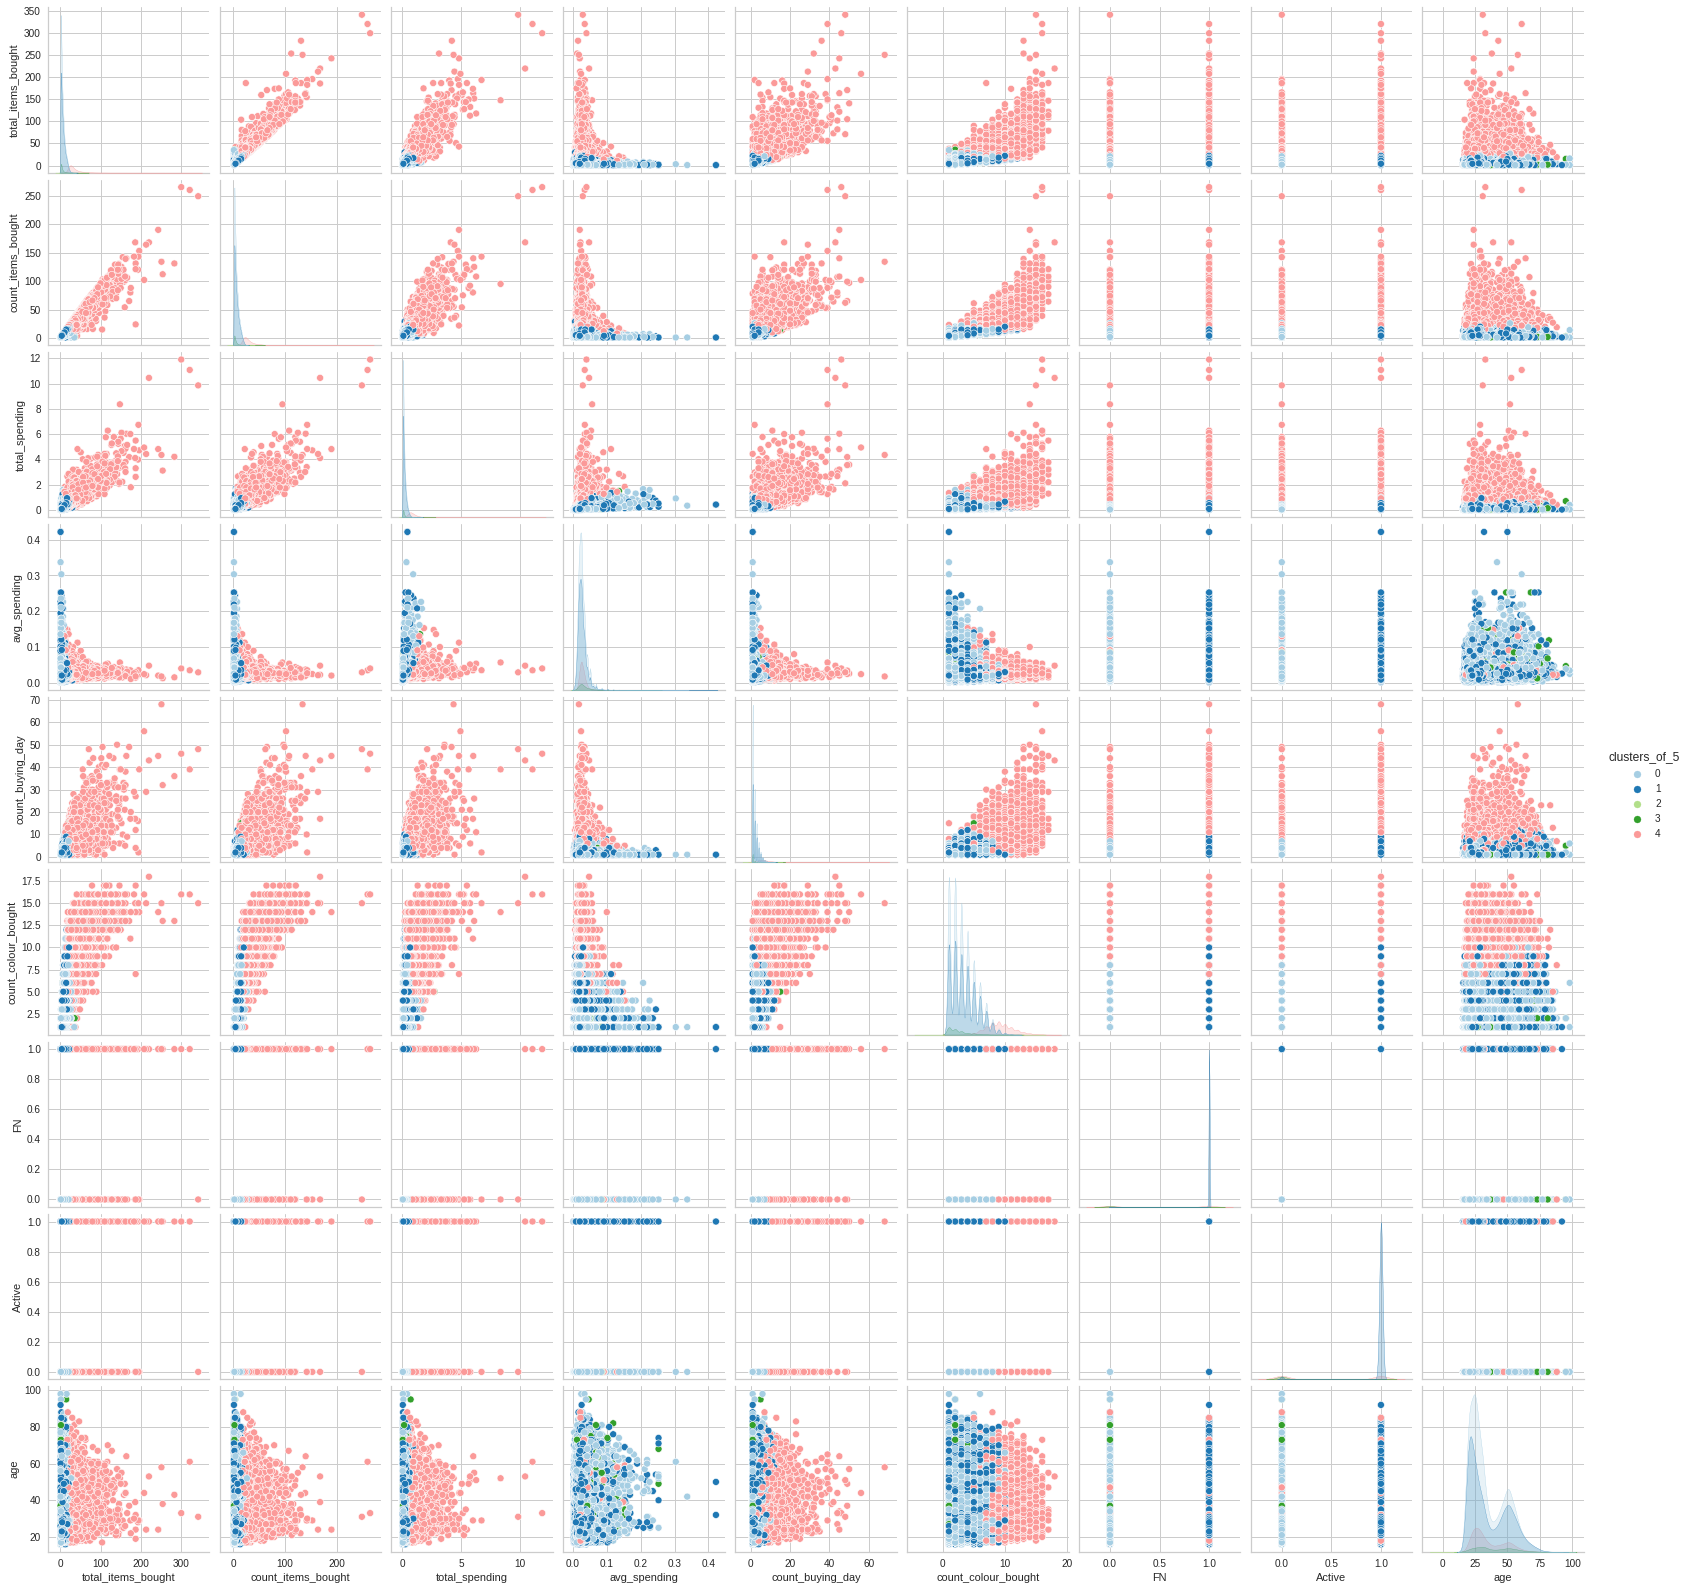

In [ ]:
result = X.sample(frac=.2, random_state=11).drop(columns=["clusters_of_15", "clusters_of_15_mb"])
sns.pairplot(result, hue="clusters_of_5", palette="Paired")
plt.show()

## 4. Model Evaluation

Pada tahap evaluasi model, kita akan coba menganalisis _cardinality_ dan _magnitude_ dari masing-masing clusters di masing-masing model tersebut (k1 = 5, k2 = 15, k3minibatch = 15)

### 4.1 Cluster Cardinality

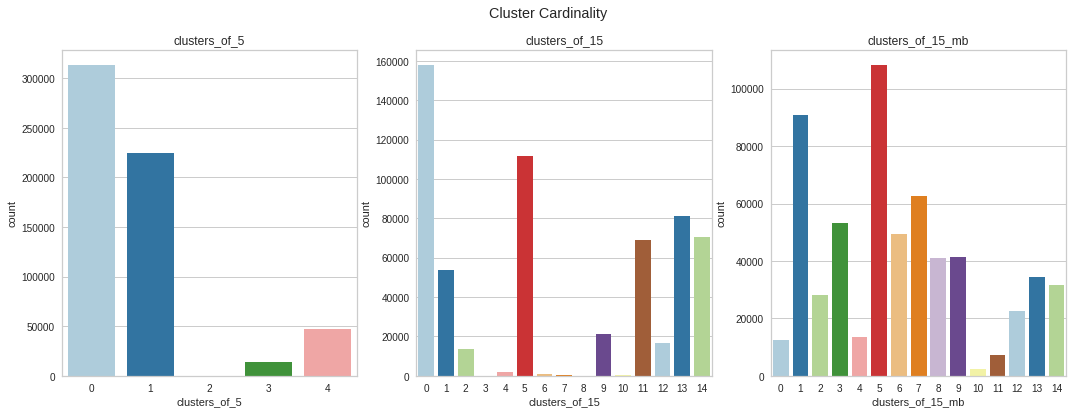

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_15", "clusters_of_15_mb"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

> **Insights**

Dari visualisasi _cluster cardinality_ di atas:
* Model dengan 5 cluster (k=5), terlihat bahwa terdapat perbedaan cukup jauh antara cluster `0` dan `1` dengan cluster `2`, `3`, dan `4`
* Model dengan 15 cluster (k=15), terlihat kardinalitas cluster `0` sangat jauh lebih banyak dibandingkan dengan cluster yang lain. Sebaliknya, cluster `3`, `4`, `6`, `7`, `8`, dan `10` memiliki jumlah elemen yang jauh lebih kecil
* beberapa cluster dengan kardinalitas yang ekstrim tersebut bisa kita tinjau lebih dalam lagi bagaimana karaketeristik customer di dalamnya. Akan tetapi, karena kita belum menentukan jumlah cluster yang optimal, silakan eksplor secara mandiri

> perlu diperhatikan bahwa nilai kardinalitas yang ekstrim bisa jadi wajar terjadi jika memang sesuai dengan konteks bisnis ([ref](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773))

### 4.2 Cluster Magnitude

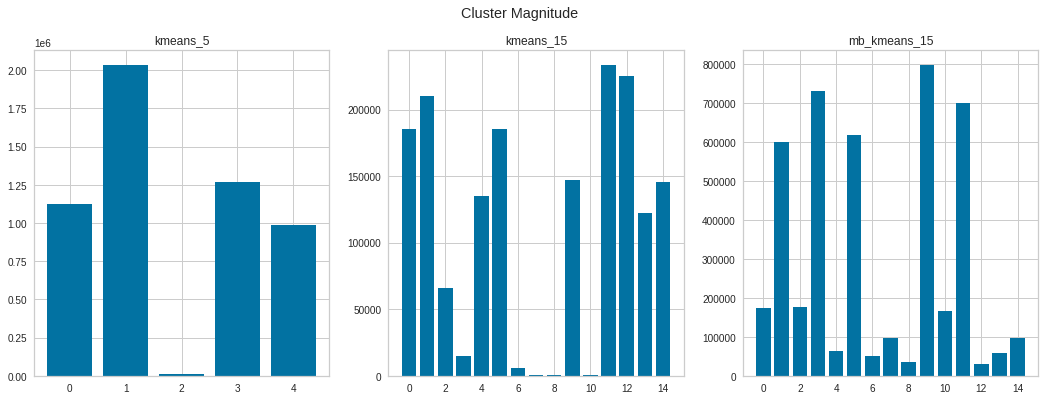

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_15, mb_kmeans_15],["kmeans_5", "kmeans_15", "mb_kmeans_15"]):
    distances = model.transform(X_scaled)
    preds = model.predict(X_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

> **Question**

Apa yang bisa kamu ambil dari visualisasi di atas? ([ref](https://developers.google.com/machine-learning/clustering/interpret))

### 4.3 Elbow Method

Untuk menggunakan elbow method, kita perlu menghitung **inertia** dari seluruh cluster.

> **inertia** adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

Kita akan mencoba beberapa nilai `k` (jumlah cluster) untuk dihitung nilai inertia-nya. Kemudian, kita akan buat visualisasi tren nilai inertia untuk masing-masing nilai `k`. **Jumlah cluster yang optimal ditentukan secara visual dengan mencari bentuk siku _elbow_ pada plot setelah inertia mulai menurun secara linier**. ([ref](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773))

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 1.565s
Clustering with n_clusters=2
Done clustering in 2.740s
Clustering with n_clusters=3
Done clustering in 8.535s
Clustering with n_clusters=4
Done clustering in 9.816s
Clustering with n_clusters=5
Done clustering in 10.174s
Clustering with n_clusters=6
Done clustering in 10.464s
Clustering with n_clusters=7
Done clustering in 10.917s
Clustering with n_clusters=8
Done clustering in 12.071s
Clustering with n_clusters=9
Done clustering in 14.647s
Clustering with n_clusters=10
Done clustering in 14.620s


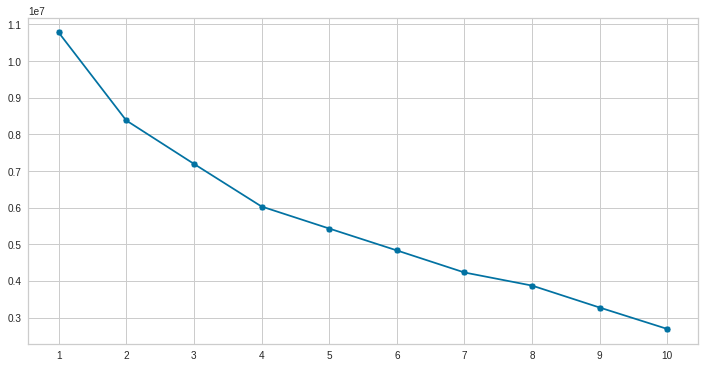

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

> Menurut kamu, dari visualisasi di atas, kira-kira berapa jumlah cluster yang paling optimal?

### 4.4 Silhouette Coefficient

* Koefisien silhouette dihitung menggunakan persamaan:

$$
\frac{b-a}{\max{(a, b)}},
$$

* dengan $a$ adalah jarak **intra-cluster**, yaitu jarak antar elemen dalam satu cluster, dan $a$ adalah jarak **inter-cluster**, yaitu jarak suatu elemen dengan elemen lain yang tidak dalam satu cluster yang sama. 

* Nilai koefisien silhouette berada pada rentang antara -1 sampai 1. Jika koefisien silhouette semakin mendekati 1, maka bisa dikatakan cluster yang dihasilkan sudah optimal.

* Kita bisa menggunakan fungsi `silhouette_score` dari scikit-learn.

* Dikarenakan data kita yang cukup besar maka untuk latihan simulasi mendapatkan nilai silhouette, kita akan coba lakukan ambil 20% dari X_scaled.

In [ ]:
limit = int(len(X_scaled)*0.2)
X_scaled_sample = X_scaled[0:limit]

In [ ]:
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled_sample)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_scaled_sample, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 1.109s
Calculating silhouette coefficient..
Done calculating in 157.291s
Clustering with n_clusters=3
Done clustering in 1.653s
Calculating silhouette coefficient..
Done calculating in 153.275s
Clustering with n_clusters=4
Done clustering in 1.861s
Calculating silhouette coefficient..
Done calculating in 152.050s
Clustering with n_clusters=5
Done clustering in 2.212s
Calculating silhouette coefficient..
Done calculating in 151.501s
Clustering with n_clusters=6
Done clustering in 2.571s
Calculating silhouette coefficient..
Done calculating in 150.911s
Clustering with n_clusters=7
Done clustering in 3.288s
Calculating silhouette coefficient..
Done calculating in 150.982s
Clustering with n_clusters=8
Done clustering in 2.657s
Calculating silhouette coefficient..
Done calculating in 150.999s
Clustering with n_clusters=9
Done clustering in 3.069s
Calculating silhouette coefficient..
Done calculating in 149.985s
Clustering with n_clusters=10
Do

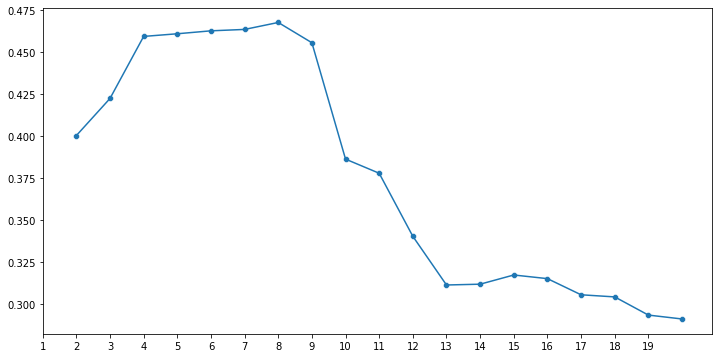

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

> **Questions** 

Apa yang bisa kamu ambil dari visualisasi silhouette score di atas? Berapa jumlah cluster dengan nilai silhouette coefficient yang paling besar?

> **Catatan:**
> Untuk kasus segmentasi customer, sebenarnya tidak cukup hanya sampai membuat cluster. Akan tetapi, hasil dari clustering kemudian akan digunakan untuk melakukan eksplorasi lebih lanjut untuk mengetahui karakteristik masing-masing cluster.